# IMPORTS

In [1]:
# TWS/IBAPI related stuff
from ibapi.client import EClient 
from ibapi.wrapper import EWrapper
from ibapi.contract import Contract

# Operational modules#
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import threading
import time 

# OPERATORS

In [2]:
def ts_delay(var, days):
    if days > 0:
        rolled = np.roll(var, days)
        rolled[:, :days] = np.nan
        return rolled
    else:
        rolled = np.roll(var, days)
        rolled[:, days:] = np.nan
        return rolled

# CONSTANTS

In [6]:
listOfTickers = ["AAPL", "MSFT", "AMZN", "FB", "TSLA"]

# DATA FUNCTIONS

In [5]:
def makeNasdaqContract(symbol, secType = "STK", exchange = "SMART", primaryExchange = "NASDAQ", currency = "USD"):
    contract = Contract()
    contract.symbol = symbol
    contract.secType = secType
    contract.exchange = exchange
    contract.primaryExchange = primaryExchange
    contract.currency = currency
    return contract

def getHistData(reqId, 
                contract, 
                durationStr,
                barSizeSetting, 
                whatToShow, 
                endDateTime = "", 
                useRTH = 1, 
                formatDate = 1, 
                keepUpToDate = 0,
                chartOptions = []):
    
    app.reqHistoricalData(reqId = reqId,
                          contract = contract,
                          endDateTime = endDateTime,
                          durationStr = durationStr,
                          barSizeSetting = barSizeSetting,
                          whatToShow = whatToShow,
                          useRTH = useRTH,
                          formatDate = formatDate,
                          keepUpToDate = keepUpToDate,
                          chartOptions = chartOptions)
    
def getHistDataMultiple(lst, time = "1 M", granularity = "5 mins", infoType = "MIDPOINT"):
    for i in range(len(lst)):
        ticker = lst[i]
        getHistData(i, makeNasdaqContract(ticker), time, granularity, infoType)
    return 0;

def getHistDataMultipleLast(lst, time = "1 M", granularity = "5 mins", infoType = "MIDPOINT"):
    for i in range(len(lst)):
        ticker = lst[i]
        getHistData(i, makeNasdaqContract(ticker), time, granularity, infoType, endDateTime = "20210819 00:00:00 EST")
    return 0;

# MAKING CONNECTION AND GETTING DATA

In [13]:
class App(EClient, EWrapper):
    def __init__(self):
        EClient.__init__(self,self)
        self.data = {}
        
    def historicalData(self, reqId, bar):
        if reqId not in self.data:
            self.data[reqId] = [bar.close]
            print(bar.close)
        else:
            self.data[reqId].append(bar.close)
    
def socketConnection():
    app.run()
            
app = App()
app.connect("127.0.0.1", 7497, 1)
socketThread = threading.Thread(target = socketConnection, daemon = True)
socketThread.start()
time.sleep(1)

getHistDataMultiple(listOfTickers, "1 M", "1 min", "MIDPOINT")

time.sleep(100)
app.disconnect()

ERROR -1 2104 Market data farm connection is OK:hfarm
ERROR -1 2104 Market data farm connection is OK:usfarm.nj
ERROR -1 2104 Market data farm connection is OK:jfarm
ERROR -1 2104 Market data farm connection is OK:eufarm
ERROR -1 2104 Market data farm connection is OK:usfuture
ERROR -1 2104 Market data farm connection is OK:cashfarm
ERROR -1 2104 Market data farm connection is OK:cafarm
ERROR -1 2104 Market data farm connection is OK:usfarm
ERROR -1 2106 HMDS data farm connection is OK:euhmds
ERROR -1 2106 HMDS data farm connection is OK:ushmds.nj
ERROR -1 2106 HMDS data farm connection is OK:fundfarm
ERROR -1 2106 HMDS data farm connection is OK:ushmds
ERROR -1 2158 Sec-def data farm connection is OK:secdefil


149.68
305.49
3288.725
364.135
710.555


In [ ]:
app.disconnect()

# GETTING DATA FROM LAST MONTH

In [60]:
class App(EClient, EWrapper):
    def __init__(self):
        EClient.__init__(self,self)
        self.data = {}
        
    def historicalData(self, reqId, bar):
        if reqId not in self.data:
            self.data[reqId] = [bar.close]
            print(bar.close)
        else:
            self.data[reqId].append(bar.close)
    
def socketConnection():
    app2.run()
            
app2 = App()
app2.connect("127.0.0.1", 7497, 1)
socketThread = threading.Thread(target = socketConnection, daemon = True)
socketThread.start()
time.sleep(1)

getHistDataMultipleLast(listOfTickers, "1 M", "1 min", "MIDPOINT")

time.sleep(100)
app2.disconnect()

ERROR -1 2104 Market data farm connection is OK:hfarm
ERROR -1 2104 Market data farm connection is OK:usfarm.nj
ERROR -1 2104 Market data farm connection is OK:eufarm
ERROR -1 2104 Market data farm connection is OK:jfarm
ERROR -1 2104 Market data farm connection is OK:usfuture
ERROR -1 2104 Market data farm connection is OK:cashfarm
ERROR -1 2104 Market data farm connection is OK:cafarm
ERROR -1 2104 Market data farm connection is OK:usfarm
ERROR -1 2106 HMDS data farm connection is OK:euhmds
ERROR -1 2106 HMDS data farm connection is OK:ushmds.nj
ERROR -1 2106 HMDS data farm connection is OK:fundfarm
ERROR -1 2106 HMDS data farm connection is OK:ushmds
ERROR -1 2158 Sec-def data farm connection is OK:secdefil


144.0
337.84
3564.98
277.945
649.77


# TURNING DATA INTO NUMPY FORM

In [38]:
data = np.zeros(len(app.data[0]))

for i in range(len(listOfTickers)):
    data = np.vstack((data, app.data[i]))
    
close = data[1:]

# TESTING MOMENTUM

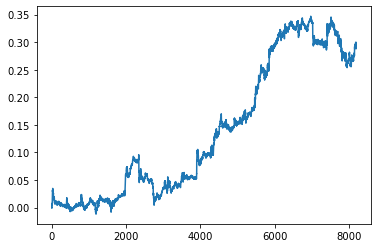

In [57]:
reversion = np.sign(((close - ts_delay(close, 1))/ts_delay(close, 1)))
future_returns = (ts_delay(close, -1) - close)/close
pnl1 = reversion * future_returns
pnl2 = np.sum(pnl1, axis = 0)
pnl = np.cumsum(np.nan_to_num(pnl2))
plt.plot(pnl)
plt.show()

# CROSS VALIDATION ON LAST MONTH

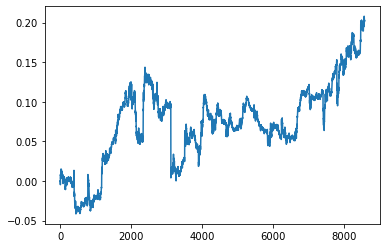

In [62]:
reversion = np.sign(((close - ts_delay(close, 1))/ts_delay(close, 1)))
future_returns = (ts_delay(close, -1) - close)/close
pnl1_prev = reversion * future_returns
pnl2_prev = np.sum(pnl1_prev, axis = 0)
pnl = np.cumsum(np.nan_to_num(pnl2))
plt.plot(pnl)
plt.show()

# TESTING MOD

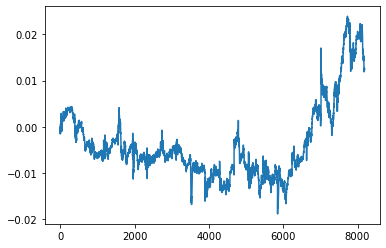

In [24]:
alpha = -(close % 1.0) + 0.5
future_returns = (ts_delay(close, -1) - close)/close
multiplied = alpha * future_returns 
summed = np.sum(multiplied, axis = 0)
plt.plot(np.cumsum(np.nan_to_num(summed)))
plt.show()

In [25]:
close 

array([[ 149.68 ,  149.855,  149.86 , ...,  145.955,  145.825,  145.825],
       [ 305.49 ,  305.18 ,  304.955, ...,  298.55 ,  298.43 ,  298.555],
       [3288.725, 3289.67 , 3284.06 , ..., 3382.47 , 3380.87 , 3380.745],
       [ 364.135,  363.445,  362.865, ...,  342.365,  342.67 ,  343.13 ],
       [ 710.555,  708.27 ,  707.535, ...,  752.085,  751.715,  751.815]])

In [37]:
close2 = close[:, 0::5]
close2.shape

(5, 328)

In [42]:
close.shape
cclose = close.copy()

In [69]:
close_every_5 = cclose[:,0::5]

In [44]:
close_every_5.shape

(5, 1638)

In [45]:
close.shape

(5, 8190)

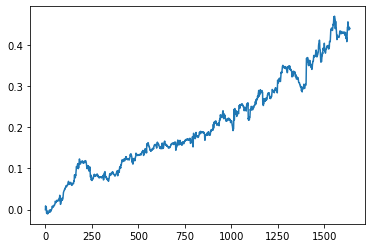

In [71]:
reversion = np.sign(-((close_every_5 - ts_delay(close_every_5, 1))/ts_delay(close_every_5, 1)))
future_returns = (ts_delay(close_every_5, -1) - close_every_5)/close_every_5
pnl1 = reversion * future_returns
pnl2 = np.sum(pnl1, axis = 0)
pnl = np.cumsum(np.nan_to_num(pnl2))
plt.plot(pnl)
plt.show()

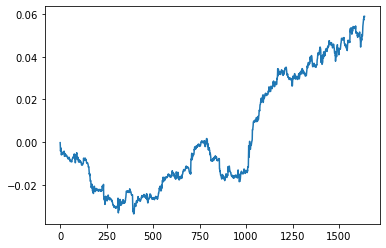

In [72]:
alpha = (close_every_5 % 1.0) - 0.5
future_returns = (ts_delay(close_every_5, -1) - close_every_5)/close_every_5
multiplied = alpha * future_returns 
summed = np.sum(multiplied, axis = 0)
plt.plot(np.cumsum(np.nan_to_num(summed)))
plt.show()

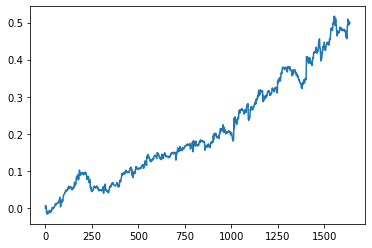

In [73]:
sume = summed + pnl2
plt.plot(np.cumsum(np.nan_to_num(sume)))
plt.show()

In [75]:
meansume = np.mean(sume)
ir = np.nanmean(sume)/np.nanstd(sume)
print(ir)

0.07138784063171949
